#### Importación de bibliotecas

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Conexión a MySQL

In [2]:
def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )

        if cnx.is_connected():
            print(f'Se conectó a la base de datos "{database}" en MySQL')

        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db

    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexión a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se creó el dataframe "{table}"')

if __name__ == '__main__':
    host = '212.227.90.6'
    user = 'EquipoE'
    password = 'E1q2u3i4p5oE'
    database = 'Equip_E'

    db = get_database(host, user, password, database)
    rename_dfs()


Se conectó a la base de datos "Equip_E" en MySQL
Tablas encontradas: ['Tourist_Accommodation'].


C:\Users\Evelyn\AppData\Local\Temp\ipykernel_10604\3597080797.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db[table] = pd.read_sql(query, con = cnx)


Conexión a MySQL cerrada.
Se creó el dataframe "Tourist_Accommodation"


#### Exploración inicial

In [3]:
df = Tourist_Accommodation
pd.set_option('display.max_columns', None) # ver todas las columnas
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,5.0,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019


##### Tamaño

In [4]:
df.shape

(10000, 35)

##### Tipos de datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 10000 non-null  int64  
 1   name                         9997 non-null   object 
 2   description                  9862 non-null   object 
 3   host_id                      10000 non-null  int64  
 4   neighbourhood_name           10000 non-null  object 
 5   neighbourhood_district       6079 non-null   object 
 6   room_type                    10000 non-null  object 
 7   accommodates                 10000 non-null  int64  
 8   bathrooms                    9926 non-null   object 
 9   bedrooms                     9930 non-null   object 
 10  beds                         9955 non-null   float64
 11  amenities_list               9983 non-null   object 
 12  price                        9746 non-null   float64
 13  minimum_nights   

##### Valores nulos

In [6]:
df.isnull().sum()

apartment_id                      0
name                              3
description                     138
host_id                           0
neighbourhood_name                0
neighbourhood_district         3921
room_type                         0
accommodates                      0
bathrooms                        74
bedrooms                         70
beds                             45
amenities_list                   17
price                           254
minimum_nights                    0
maximum_nights                    0
has_availability                550
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              2604
last_review_date               2605
review_scores_rating           2709
review_scores_accuracy         2718
review_scores_cleanliness      2712
review_scores_checkin          2723
review_scores_communication 

##### Duplicados

In [7]:
df.duplicated().sum()

np.int64(0)

##### Análisis estadísticos y outliers


 Distribución Variables Numéricas:

                               Media  Desviación estándar  Mínimo  Q1 (25%)  Mediana  Q3 (75%)   Máximo
accommodates                    4.27                 2.58     1.0       2.0      4.0       6.0     29.0
beds                            2.92                 2.26     0.0       1.0      2.0       4.0     30.0
price                        1021.37               974.85    60.0     450.0    750.0    1240.0  28571.0
minimum_nights                  4.95                17.73     1.0       1.0      2.0       4.0   1125.0
maximum_nights                759.77               498.37     1.0      62.0   1125.0    1125.0   1125.0
availability_30                13.01                11.84     0.0       0.0     11.0      26.0     30.0
availability_60                28.76                22.97     0.0       2.0     29.0      53.0     60.0
availability_90                46.11                33.75     0.0      10.0     49.0      80.0     90.0
availability_365           

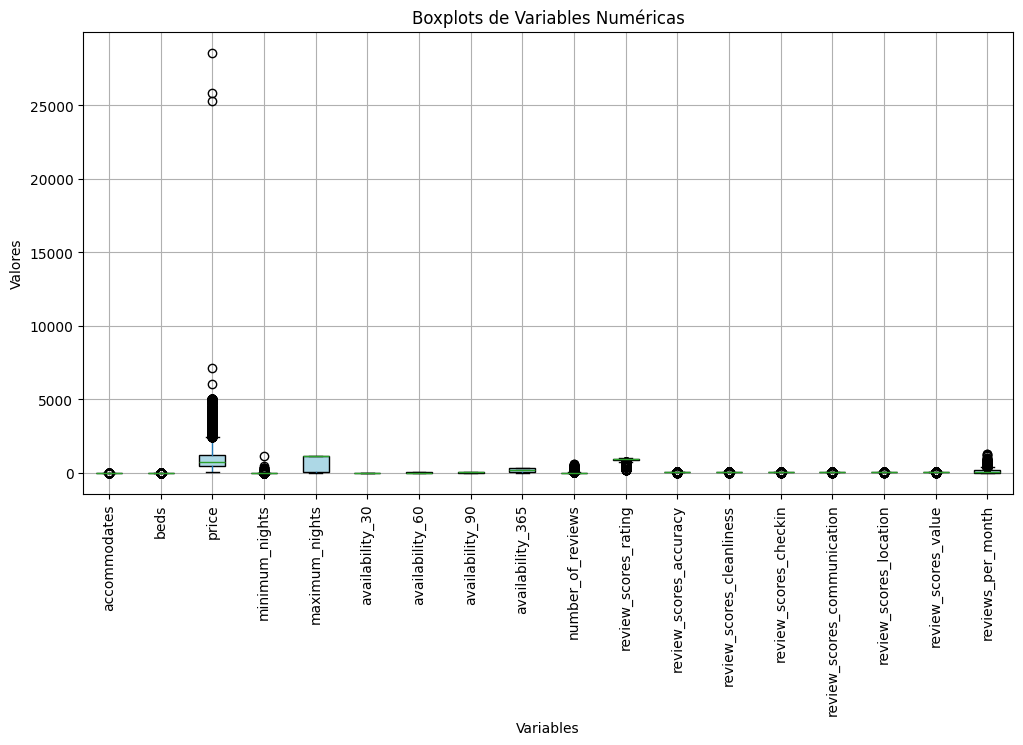

In [8]:
# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number]).drop(columns=['apartment_id', 'host_id'],errors = 'ignore')

# Calcular estadísticas básicas
estadisticas = df_numericas.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estadisticas.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Q1 (25%)', 'Mediana', 'Q3 (75%)', 'Máximo']

# Redondear a dos decimales
estadisticas = estadisticas.round(2)

# Mostrar estadísticas
print("\n Distribución Variables Numéricas:\n")
print(estadisticas.to_string())

# Crear boxplots de todas las variables numéricas
plt.figure(figsize=(12, 6))
df_numericas.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots de Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

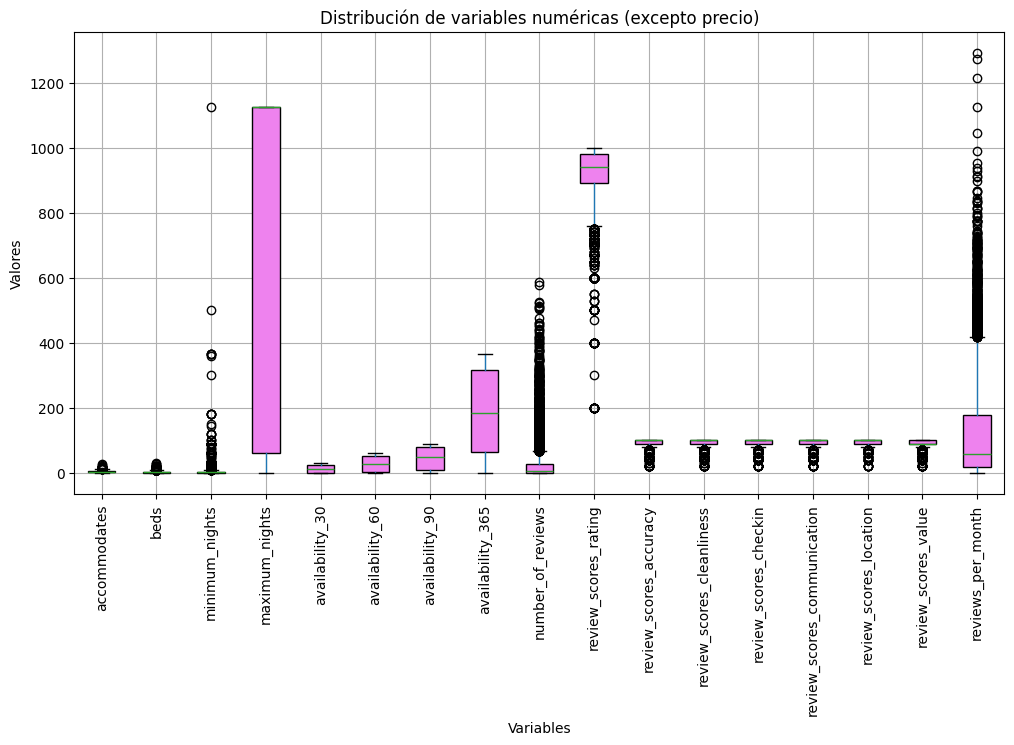

In [9]:
# nuevo gráfico para poder ver mejor las distribuciones

df_no_price = df_numericas.drop('price', axis=1)
plt.figure(figsize=(12, 6))
df_no_price.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="violet"))
plt.title("Distribución de variables numéricas (excepto precio)")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

#### Limpieza de datos

In [10]:
# valores nulos
df.isnull().sum()

apartment_id                      0
name                              3
description                     138
host_id                           0
neighbourhood_name                0
neighbourhood_district         3921
room_type                         0
accommodates                      0
bathrooms                        74
bedrooms                         70
beds                             45
amenities_list                   17
price                           254
minimum_nights                    0
maximum_nights                    0
has_availability                550
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              2604
last_review_date               2605
review_scores_rating           2709
review_scores_accuracy         2718
review_scores_cleanliness      2712
review_scores_checkin          2723
review_scores_communication 

In [11]:
# MEJORAS DE LIMPIEZA(Posibles)

# Tratado: has_availability(binaria), neighbourhood_district(categorica), description, neighborhood_overview y license eliminadas

# Analizado no tratado: reviews_per_month

# PENDIENTE DE DECIDIR COMO TRATAR
#  En duda: name

# bathrooms, bedrroms, beds son parecidos pocos nulos y seguramente si no se anuncian es porque estan en el minimo indispensable(yo substituiria por min)

# Variables referentes a reviews(tienen numero de nulos similares, por lo que seguramente estan relacionados)

In [12]:
# Eliminar columnas 'description','neighborhood_overview', 'license'
df = df.drop(columns=['description'])

In [13]:
# Análisis de nulos de reviews_per_month

df_nulos = df[df['reviews_per_month'].isna()]
df_nulos[['reviews_per_month','number_of_reviews']].tail(10)

,reviews_per_month,number_of_reviews
9988,NaN,0
9990,NaN,0
9991,NaN,0
9992,NaN,0
9994,NaN,0
9995,NaN,0
9996,NaN,0
9997,NaN,0
9998,NaN,0
9999,NaN,0


Se observa que la mayoría de los valores nulos en reviews_per_month están justificados, ya que corresponden a alojamientos que no han recibido ninguna reseña.

In [14]:
# Averiguar si hay algún valor nulo con reseña
print((df_nulos['number_of_reviews'] > 0).any())

True


In [15]:
# Crear tabla de aquellos nulos con reseñas
df_nulos_filtrados = df_nulos[df_nulos['number_of_reviews'] > 0]
df_nulos_filtrados[['name', 'number_of_reviews', 'reviews_per_month']]

,name,number_of_reviews,reviews_per_month
4985,Club Villamar - Gomez,1,NaN
5213,Single room luminous Sagrada Familia WIFI new ...,1,NaN
6393,Habitacion para disfrutar un descanso conforta...,1,NaN


Existen 3 alojamientos que tienen 1 review, pero presentan valores nulos en reviews_per_month.

In [16]:
# Analisis del resto de columnas de reviews

# Seleccionar solo las columnas de interés
cols_reviews = [
    'first_review_date', 'last_review_date', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value'
]

# Filtrar filas donde TODAS las columnas están nulas
df_todas_nulas = df[df[cols_reviews].isnull().all(axis=1)]

# Filtrar filas donde ALGUNA columna está nula, pero no todas
df_parcialmente_nulas = df[df[cols_reviews].isnull().any(axis=1) & ~df[cols_reviews].isnull().all(axis=1)]

# Mostrar el número de filas en cada caso
print(f"Filas con nulos en TODAS las columnas: {len(df_todas_nulas)}")
print(f"Filas con nulos en ALGUNAS columnas, pero no en todas: {len(df_parcialmente_nulas)}")

Filas con nulos en TODAS las columnas: 2603
Filas con nulos en ALGUNAS columnas, pero no en todas: 128


La mayoría de los valores nulos se repiten en todas las columnas, con un total de 2603 filas completamente nulas, mientras que solo 128 filas presentan nulos en algunas columnas.

In [17]:
# Verificar si todas las filas en df_todas_nulas tienen number_of_reviews == 0
todas_nulas_son_cero = (df_todas_nulas['number_of_reviews'] == 0).all()

print(f"¿Todas las filas con valores nulos en 'cols_reviews' tienen 'number_of_reviews' igual a 0?: {todas_nulas_son_cero}")

¿Todas las filas con valores nulos en 'cols_reviews' tienen 'number_of_reviews' igual a 0?: False


In [18]:
# Locales duplicados
df['name'].duplicated().sum()

np.int64(332)

Hay 331 locales duplicados.

In [19]:
# Frecuencia de los locales
duplicados = df['name'].value_counts()
duplicados = duplicados[duplicados > 1]  # Filtrar solo los que están duplicados

print(duplicados)

name
Beautiful two bedroom appartment with comunitary swiming-pool    4
Loft/Estudio                                                     3
Apartaments Ponent 1 habitacion                                  3
Amazing studio in Mayor Street.                                  3
Room in the heart of barcelona                                   3
                                                                ..
Barcelona Home with a View                                       2
Hostal Bruselas Hab. #7 con ba�o privado y balc�n                2
Recoletos IX                                                     2
Finca rural Els Ametllers                                        2
Apartment Sant Lluis,2 minutes walk from the beach               2
Name: count, Length: 319, dtype: int64


Se observan errores en los nombres, como el hecho de que el más repetido sea una descripción genérica en lugar de un nombre único de alojamiento.



In [20]:
# Substituir los NA por False
df['has_availability'] = df['has_availability'].fillna(False)

In [21]:
df['has_availability'].unique()

array(['VERDADERO', False], dtype=object)

In [22]:
# Imputación de valores nulos en 'neighbourhood_district' utilizando la moda de 'neighbourhood_name' filtrando por 'city'.

df['neighbourhood_district'] = df.groupby(['city', 'neighbourhood_name'])['neighbourhood_district'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido")
)

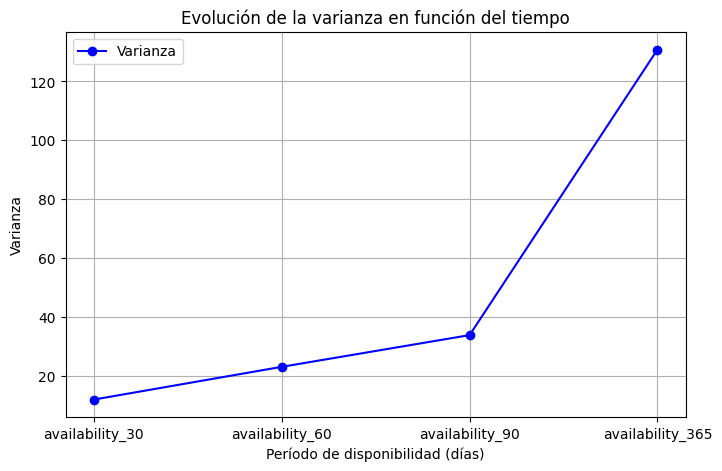

In [23]:
# Datos de varianza (según los valores que compartiste)
periodos = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
varianzas = [11.84, 22.97, 33.75, 130.78]  # Valores de varianza

# Graficar la tendencia de la varianza
plt.figure(figsize=(8, 5))
plt.plot(periodos, varianzas, marker='o', linestyle='-', color='b', label="Varianza")
plt.xlabel("Período de disponibilidad (días)")
plt.ylabel("Varianza")
plt.title("Evolución de la varianza en función del tiempo")
plt.grid(True)
plt.legend()
plt.show()

## EDA CX

In [24]:
# valores únicos en cada columna
df.apply(pd.Series.nunique)

apartment_id                   9650
name                           9667
host_id                        7269
neighbourhood_name              521
neighbourhood_district           62
room_type                         4
accommodates                     21
bathrooms                        14
bedrooms                         15
beds                             24
amenities_list                 9704
price                           419
minimum_nights                   49
maximum_nights                  147
has_availability                  2
availability_30                  31
availability_60                  61
availability_90                  91
availability_365                366
number_of_reviews               319
first_review_date              2159
last_review_date               1522
review_scores_rating             46
review_scores_accuracy            9
review_scores_cleanliness         9
review_scores_checkin             8
review_scores_communication       8
review_scores_location      

In [25]:
# se elimina columna país, solo "Spain"
df = df.drop(['country'], axis=1)

### Rating

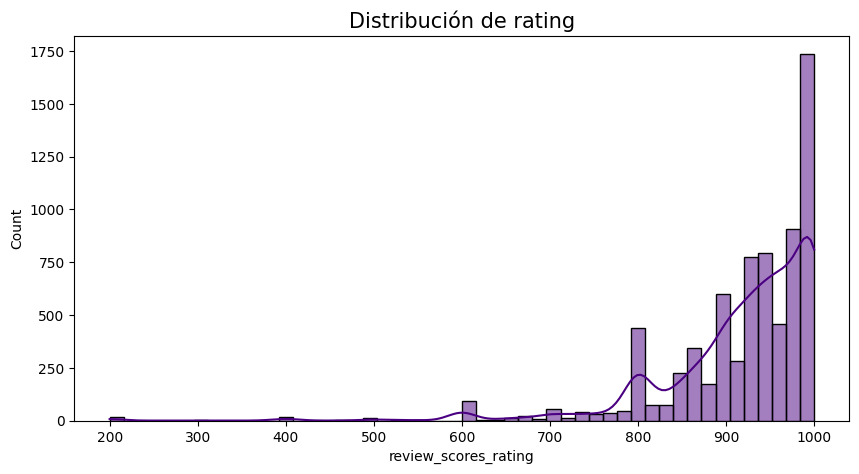

In [28]:
plt.figure(figsize=(10, 5))

sns.histplot(df['review_scores_rating'], bins=50, kde=True, color='indigo')

plt.title('Distribución de rating', fontsize=15)
plt.show();

### Accuracy

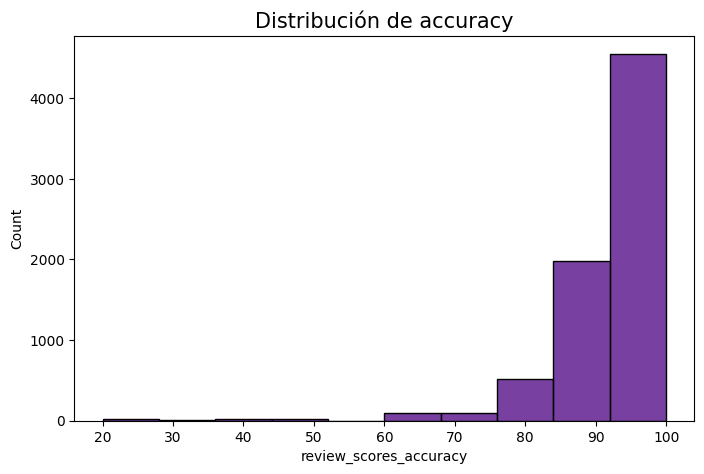

In [34]:
plt.figure(figsize=(8, 5))

sns.histplot(df['review_scores_accuracy'], bins=10, color='indigo')

plt.title('Distribución de accuracy', fontsize=15)
plt.show();

### Cleanliness

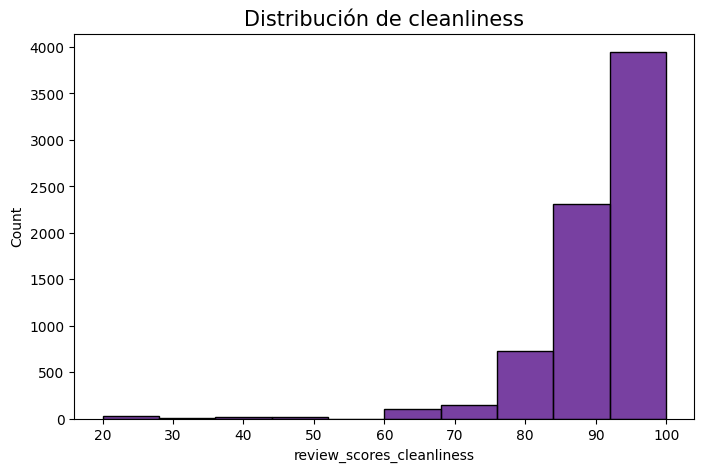

In [35]:
plt.figure(figsize=(8, 5))

sns.histplot(df['review_scores_cleanliness'], bins=10, color='indigo')

plt.title('Distribución de cleanliness', fontsize=15)
plt.show();

### Checkin

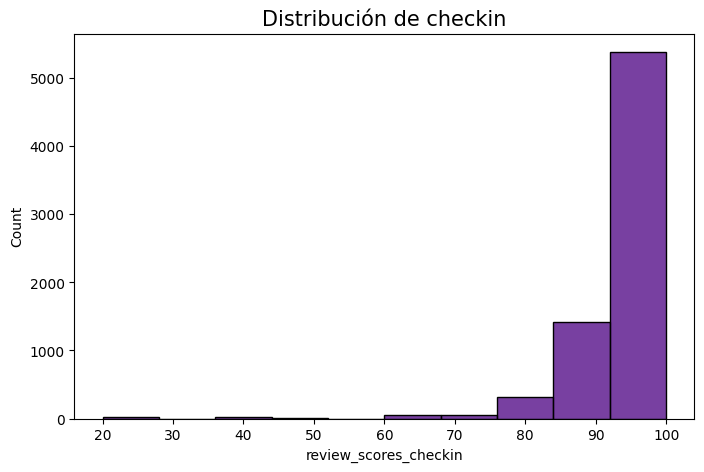

In [36]:
plt.figure(figsize=(8, 5))

sns.histplot(df['review_scores_checkin'], bins=10, color='indigo')

plt.title('Distribución de checkin', fontsize=15)
plt.show();

### Communication

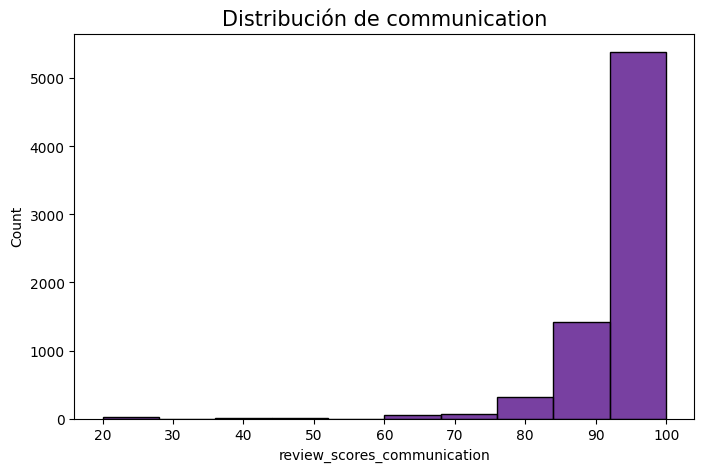

In [37]:
plt.figure(figsize=(8, 5))

sns.histplot(df['review_scores_communication'], bins=10, color='indigo')

plt.title('Distribución de communication', fontsize=15)
plt.show();

### Location

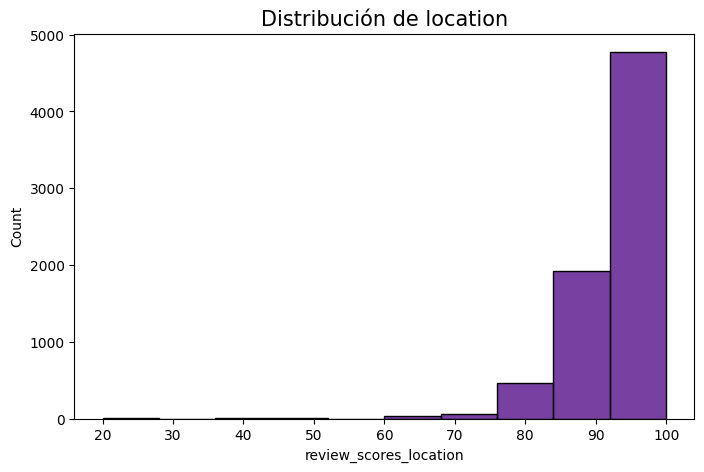

In [38]:
plt.figure(figsize=(8, 5))

sns.histplot(df['review_scores_location'], bins=10, color='indigo')

plt.title('Distribución de location', fontsize=15)
plt.show();

### Value

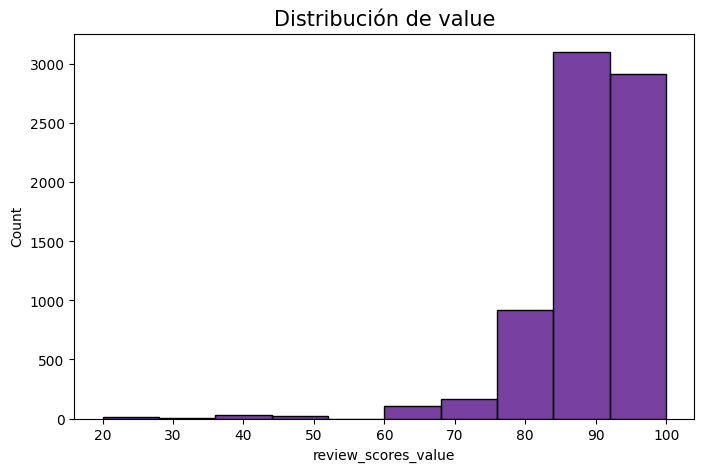

In [39]:
plt.figure(figsize=(8, 5))

sns.histplot(df['review_scores_value'], bins=10, color='indigo')

plt.title('Distribución de value', fontsize=15)
plt.show();